In [82]:
import numpy as np
import pandas as pd
import spacy

# 데이터 불러오기

In [110]:
txt_path1 = '../AI Hub - 대화 데이터셋/한영 말뭉치/1.구어체.xlsx'
txt_path2 = '../AI Hub - 대화 데이터셋/한영 말뭉치/2.대화체.xlsx'
txt_path3 = '../AI Hub - 대화 데이터셋/한영 말뭉치/3.문어체-뉴스.xlsx'

In [111]:
df1 = pd.read_excel(txt_path1, sheet_name='Sheet1')
df1 = df1[['ko','en']]
df1.head()

,ko,en
0,나는 매일 저녁 배트를 만나러 다락방으로 가요.,I go to the attic every evening to meet Bat.
1,선생님 이문장이 이해가 안 가요.,"Sir, I don't understand this sentence here."
2,컴퓨터를 시작하면 시간이 너무 빠르게 가요.,Time flies when you start using the computer.
3,나는 오늘 자정에 한국으로 돌아 가요.,I'm going back to Korea today at midnight.
4,나는 일어나자마자 화장실에 가요.,I go to bathroom as soon as I wake up.


In [112]:
df2 = pd.read_excel(txt_path2, sheet_name='Sheet1')
df2 = df2[['한국어','영어']]
df2.columns = ['ko','en']
df2.head()

,ko,en
0,이번 신제품 출시에 대한 시장의 반응은 어떤가요?,How is the market's reaction to the newly rele...
1,판매량이 지난번 제품보다 빠르게 늘고 있습니다.,The sales increase is faster than the previous...
2,그렇다면 공장에 연락해서 주문량을 더 늘려야겠네요.,"Then, we'll have to call the manufacturer and ..."
3,"네, 제가 연락해서 주문량을 2배로 늘리겠습니다.","Sure, I'll make a call and double the volume o..."
4,지난 회의 마지막에 논의했던 안건을 다시 볼까요?,Shall we take a look at the issues we discusse...


In [113]:
df3 = pd.read_excel(txt_path3, sheet_name='번역')
df3 = df3[['한국어','영어']]
df3.columns = ['ko','en']
df3.head()

,ko,en
0,하늘길 운항노선도 광주-제주 광주-양양 광주-김해 등 국내는 물론 일본과 중국 등 ...,The airway route will be gradually expanded do...
1,저가항공보다는 프레미엄 비즈니스 전문 항공사를 추구하는 에어필립은 지방 도시간 항공...,"It is expected that Air Philip, which seeks fo..."
2,울릉도와 흑산도 등의 소형공항이 수년 내 문을 열 경우 광주․전남 지역민의 관광 접...,If small airport such as Ulleungdo and Heuksan...
3,지역민들이 해외여행을 위해 인천공항에 갈 때마다 고속버스에 ‘수화물’을 싣고 내리던...,It mitigated inconvenience of local people tha...
4,포항출신인 필립에셋 엄일석 회장은 “광주에 18년 동안 살면서 강원도나 인천공항에 ...,"Eom Il-seok, president of Phillip Asset, who i..."


In [114]:
df_fin = pd.concat([df1,df2,df3])
df_fin.head()

,ko,en
0,나는 매일 저녁 배트를 만나러 다락방으로 가요.,I go to the attic every evening to meet Bat.
1,선생님 이문장이 이해가 안 가요.,"Sir, I don't understand this sentence here."
2,컴퓨터를 시작하면 시간이 너무 빠르게 가요.,Time flies when you start using the computer.
3,나는 오늘 자정에 한국으로 돌아 가요.,I'm going back to Korea today at midnight.
4,나는 일어나자마자 화장실에 가요.,I go to bathroom as soon as I wake up.


In [115]:
len(df1), len(df2), len(df3), len(df_fin)

(75000, 20000, 9057, 104057)

In [143]:
korean = df_fin['ko'].values
english = df_fin['en'].values
len(korean), len(english)

(104057, 104057)

In [152]:
korean[0], english[0]

('나는 매일 저녁 배트를 만나러 다락방으로 가요.', 'I go to the attic every evening to meet Bat.')

# 한국어 tokenizer 

In [118]:
from konlpy.tag import Mecab
tokenizer = Mecab()

In [119]:
tokenizer.morphs(korean[1])

['선생', '님', '이', '문장', '이', '이해', '가', '안', '가', '요', '.']

In [120]:
' '.join(tokenizer.morphs(korean[1]))

'선생 님 이 문장 이 이해 가 안 가 요 .'

In [122]:
f = open('korean.txt', 'w')
for i in range(len(korean)):
    txt = ' '.join(tokenizer.morphs(korean[i])) + '\n'
    f.write(txt)
f.close()

In [123]:
f = open('korean.txt')
f.readlines(100)

['나 는 매일 저녁 배트 를 만나 러 다락방 으로 가요 .\n',
 '선생 님 이 문장 이 이해 가 안 가 요 .\n',
 '컴퓨터 를 시작 하 면 시간 이 너무 빠르 게 가 요 .\n',
 '나 는 오늘 자정 에 한국 으로 돌 아 가 요 .\n']

In [124]:
f.close()

# 영어 tokenizer

In [125]:
spacy_en = spacy.load('en')

In [126]:
def tokenize_en(text):
    return [tok.text for tok in spacy_en.tokenizer(text)]

In [127]:
tokenize_en(english[0])

['I', 'go', 'to', 'the', 'attic', 'every', 'evening', 'to', 'meet', 'Bat', '.']

In [128]:
f = open('english.txt', 'w')
for i in range(len(english)):
    txt = ' '.join(tokenize_en(english[i])) + '\n'
    f.write(txt)
f.close()

In [129]:
f = open('english.txt')
f.readlines(100)

['I go to the attic every evening to meet Bat .\n',
 "Sir , I do n't understand this sentence here .\n",
 'Time flies when you start using the computer .\n']

In [130]:
f.close()

# 훈련 데이터 형태로 만들자.

In [153]:
raw_data = {'Korean' : [' '.join(tokenizer.morphs(line)) for line in korean], 
            'Korean': [' '.join(tokenize_en(line)) for line in english]}

In [154]:
raw_data['Korean'][104055], raw_data['English'][104055]

('앞서 네 팔 경찰 과 현지 언론 은 김 대장 등 5 명 을 포함 한 9 명 이 눈 폭풍 에 의한 산사태 로 사망 했 다고 전했 다 .',
 'Earlier , Nepalese police and local media said nine people , including Kim , were killed in landslides caused by snowstorms . \n')

In [158]:
df = pd.DataFrame(raw_data, columns=['Korean','English'])
df['ko_len'] = df['Korean'].str.count(' ')+1
df['en_len'] = df['English'].str.count(' ')+1
df.head()

,Korean,English,ko_len,en_len
0,나 는 매일 저녁 배트 를 만나 러 다락방 으로 가요 .,I go to the attic every evening to meet Bat .,12,11
1,선생 님 이 문장 이 이해 가 안 가 요 .,"Sir , I do n't understand this sentence here .",11,10
2,컴퓨터 를 시작 하 면 시간 이 너무 빠르 게 가 요 .,Time flies when you start using the computer .,13,9
3,나 는 오늘 자정 에 한국 으로 돌 아 가 요 .,I 'm going back to Korea today at midnight .,12,10
4,나 는 일어나 자마자 화장실 에 가요 .,I go to bathroom as soon as I wake up .,8,11


In [159]:
len(df)

104057

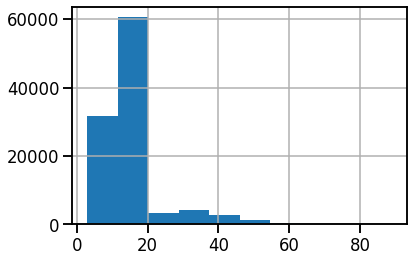

In [163]:
df['ko_len'].hist()

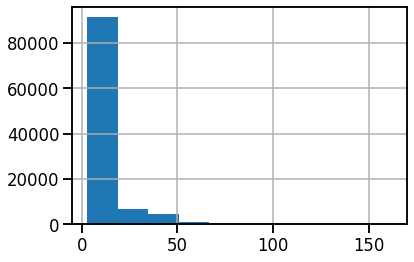

In [164]:
 df['en_len'].hist()

In [166]:
df.to_csv('korean-english.csv', index=False)